In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the dataset
data = pd.read_csv('AB_NYC_2019.csv')

In [5]:
# Initial data exploration
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Removing unnecessary columns
data = data.drop(columns=['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'])

In [7]:
# Handling missing values
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [8]:
# Converting price to a numerical value
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype('float')

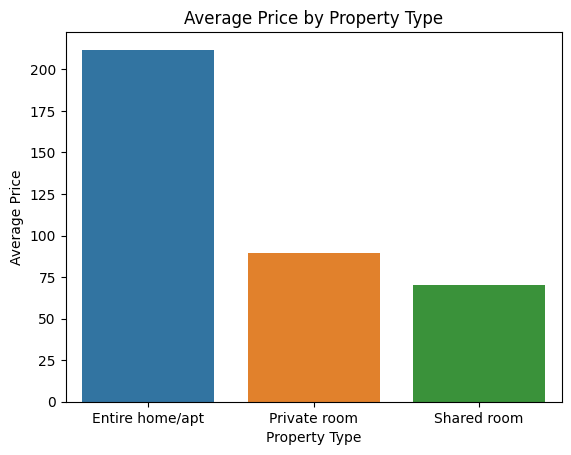

In [9]:
# Exploring the relationship between property types and price
prop_type = data.groupby('room_type')['price'].mean().reset_index()
sns.barplot(x='room_type', y='price', data=prop_type)
plt.xlabel("Property Type")
plt.ylabel("Average Price")
plt.title("Average Price by Property Type")
plt.show()

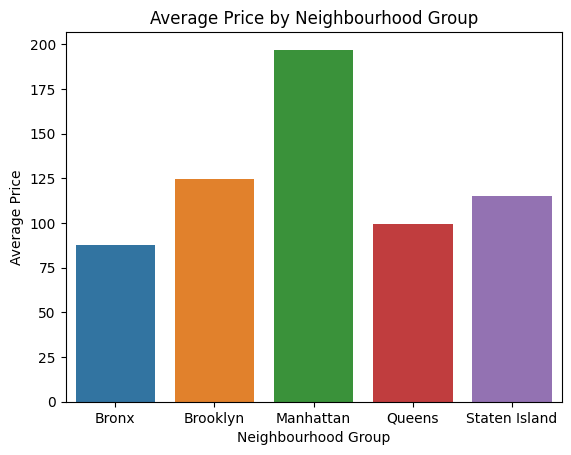

In [10]:
# Visualizing the effect of location (neighborhood) on the price
neighborhood_price = data.groupby('neighbourhood_group')['price'].mean().reset_index()
sns.barplot(x='neighbourhood_group', y='price', data=neighborhood_price)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.title("Average Price by Neighbourhood Group")
plt.show()

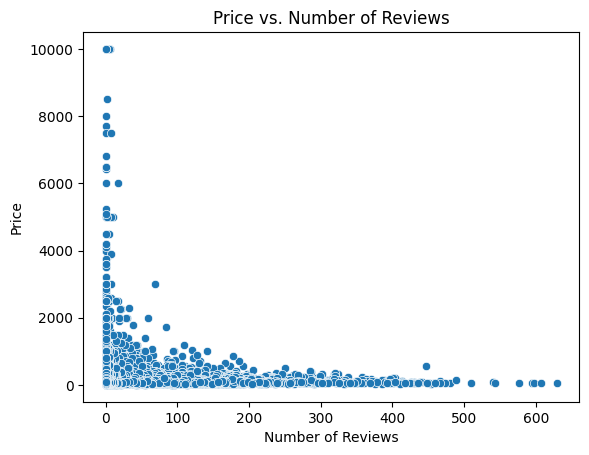

In [11]:
# Exploring the relationship between the number of reviews and price
sns.scatterplot(x='number_of_reviews', y='price', data=data)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Price vs. Number of Reviews")
plt.show()

In [ ]:
# Analyzing the impact of availability on the price
